In [1]:
import os 
import sys 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
SEED = 43
VERBOSE = True 

print(f"System version : {sys.version}")

System version : 3.7.11 (default, Jul 27 2021, 07:03:16) 
[Clang 10.0.0 ]


In [3]:
item_df = pd.read_csv('../data/ml_100k/item_data.csv')
item_df.head()

,id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
train_df = pd.read_csv('../data/ml_100k/train_data.csv')
train_df.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [5]:
title_series = pd.Series(data=item_df['title'].values, index=item_df['id'].values)
user_item_mapper = train_df.copy()
user_item_mapper['title'] = user_item_mapper['item_id'].map(title_series)
user_item_mapper.head()

,user_id,item_id,rating,timestamp,title
0,1,1,5,874965758,Toy Story (1995)
1,1,2,3,876893171,GoldenEye (1995)
2,1,3,4,878542960,Four Rooms (1995)
3,1,4,3,876893119,Get Shorty (1995)
4,1,5,3,889751712,Copycat (1995)


In [6]:
user_item_mapper.drop(['rating', 'item_id', 'timestamp'], axis=1, inplace=True)
user_item_mapper = user_item_mapper.groupby(['user_id'])['title'].apply(list).reset_index()
user_item_mapper.head()

,user_id,title
0,1,"[Toy Story (1995), GoldenEye (1995), Four Room..."
1,2,"[Toy Story (1995), Richard III (1995), Postino..."
2,3,"[Return of the Jedi (1983), Contact (1997), Ev..."
3,4,"[Seven (Se7en) (1995), Indiana Jones and the L..."
4,5,"[Muppet Treasure Island (1996), Birdcage, The ..."


In [7]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()

title_list = user_item_mapper['title'].values
te_ary = te.fit(title_list).transform(title_list)
dummy_df = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
dummy_df.head()

,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


---
Frequent Item set mining

In [9]:
from mlxtend.frequent_patterns import apriori

apriori_frequent_itemsets = apriori(dummy_df, min_support=0.1, use_colnames=True, max_len=3)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [10]:
apriori_frequent_itemsets

,support,itemsets
0,0.108165,(12 Angry Men (1957))
1,0.214210,(2001: A Space Odyssey (1968))
2,0.107105,(Absolute Power (1997))
3,0.123012,"(Abyss, The (1989))"
4,0.126193,"(African Queen, The (1951))"
...,...,...
10299,0.106045,"(Terminator 2: Judgment Day (1991), When Harry..."
10300,0.108165,"(Terminator 2: Judgment Day (1991), Twelve Mon..."
10301,0.115589,"(Twelve Monkeys (1995), Twister (1996), Toy St..."
10302,0.125133,"(Twelve Monkeys (1995), Willy Wonka and the Ch..."


In [11]:
dummy_df.shape

(943, 1633)

In [12]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth_frequent_itemsets = fpgrowth(dummy_df, min_support=0.1, use_colnames=True,max_len=2)
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [13]:
fpgrowth_frequent_itemsets

,support,itemsets
0,0.513256,(Star Wars (1977))
1,0.447508,(Return of the Jedi (1983))
2,0.406151,(Toy Story (1995))
3,0.360551,"(Godfather, The (1972))"
4,0.327678,(Jerry Maguire (1996))
...,...,...
3409,0.103924,"(Monty Python and the Holy Grail (1974), Monty..."
3410,0.106045,"(Apt Pupil (1998), Titanic (1997))"
3411,0.102863,"(Executive Decision (1996), Mission: Impossibl..."
3412,0.104984,"(Executive Decision (1996), Rock, The (1996))"


---
Association rule mining

In [14]:
%%time
from mlxtend.frequent_patterns import association_rules
rules = association_rules(apriori_frequent_itemsets, metric="lift", min_threshold=0.01)

CPU times: user 313 ms, sys: 11.2 ms, total: 325 ms
Wall time: 325 ms


In [15]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2001: A Space Odyssey (1968)),(Alien (1979)),0.214210,0.236479,0.120891,0.564356,2.386494,0.070235,1.752627
1,(Alien (1979)),(2001: A Space Odyssey (1968)),0.236479,0.214210,0.120891,0.511211,2.386494,0.070235,1.607625
2,(Aliens (1986)),(2001: A Space Odyssey (1968)),0.239661,0.214210,0.121951,0.508850,2.375471,0.070614,1.599897
3,(2001: A Space Odyssey (1968)),(Aliens (1986)),0.214210,0.239661,0.121951,0.569307,2.375471,0.070614,1.765386
4,(Amadeus (1984)),(2001: A Space Odyssey (1968)),0.231177,0.214210,0.127253,0.550459,2.569716,0.077733,1.747982
...,...,...,...,...,...,...,...,...,...
47593,"(Willy Wonka and the Chocolate Factory (1971),...",(Twister (1996)),0.196182,0.254507,0.109226,0.556757,2.187590,0.059296,1.681905
47594,"(Twister (1996), Toy Story (1995))",(Willy Wonka and the Chocolate Factory (1971)),0.180276,0.275716,0.109226,0.605882,2.197489,0.059521,1.837736
47595,(Willy Wonka and the Chocolate Factory (1971)),"(Twister (1996), Toy Story (1995))",0.275716,0.180276,0.109226,0.396154,2.197489,0.059521,1.357505
47596,(Twister (1996)),"(Willy Wonka and the Chocolate Factory (1971),...",0.254507,0.196182,0.109226,0.429167,2.187590,0.059296,1.408148


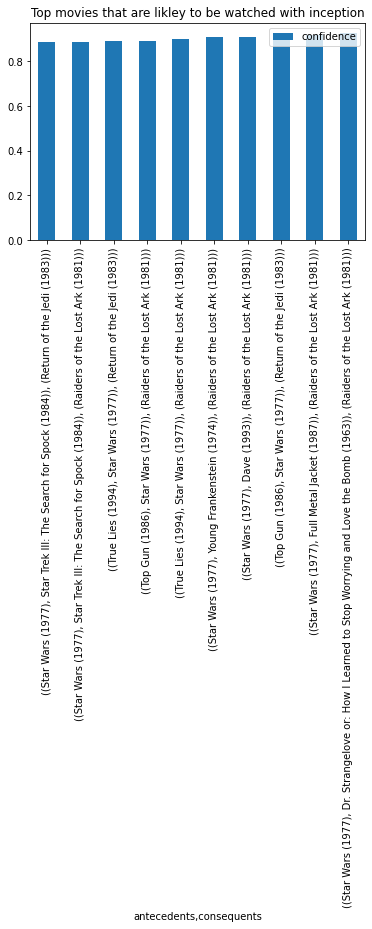

In [16]:
rules[rules["antecedents"].apply(lambda x: "Star Wars (1977)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');


In [17]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))

findfont: Font family ['FreeMono'] not found. Falling back to DejaVu Sans.


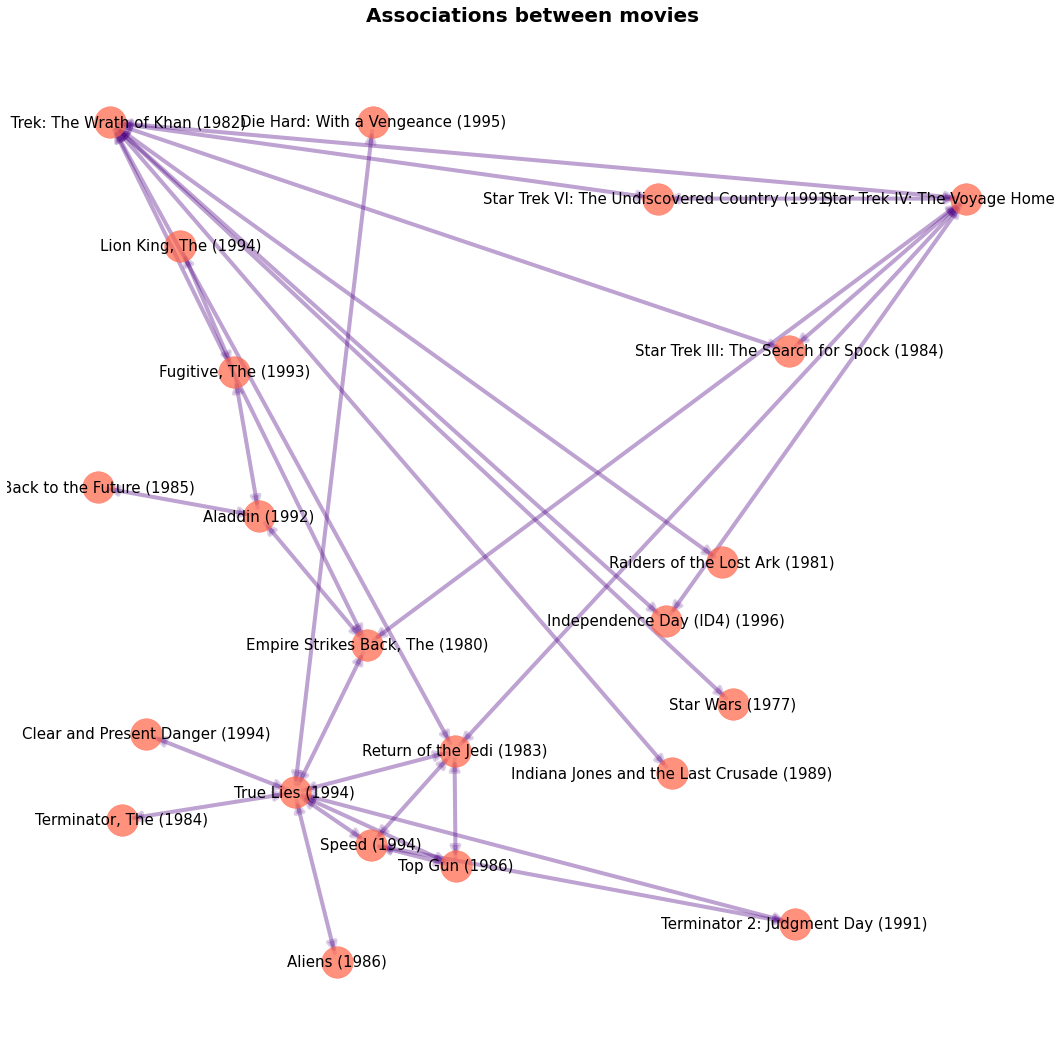

In [18]:
import networkx as nx

plt.figure(figsize=(15,15))
plt.style.use('fivethirtyeight')
edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift').head(100) ,source='antecedents',target='consequents',edge_attr=None, create_using=nx.DiGraph())
# plt.subplots(figsize=(40,30))
plt.suptitle('Associations between movies', fontsize = 20,fontweight = 'bold')
pos = nx.nx_pydot.pydot_layout(edges)
nx.draw_networkx_nodes(edges, pos, node_size = 1000,alpha= 0.7,node_color = 'tomato')
nx.draw_networkx_edges(edges, pos, width = 4, alpha = 0.2, edge_color = 'indigo', arrows=True, arrowsize=20)
nx.draw_networkx_labels(edges, pos, font_size = 15, font_family = 'FreeMono',)
plt.grid()
plt.axis('off')
plt.tight_layout()
plt.show()

---
Model Drift & Prediction impact Analysis with Association rule mining

In [19]:
train_df = pd.read_csv('../data/ml_100k/train_data.csv')
train_df.head()

,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [20]:
# chronological splitting
import cornac
from recommenders.datasets.python_splitters import python_chrono_split
train_df, val_df = python_chrono_split(train_df,
                                        ratio=0.8,
                                        min_rating=10,
                                        filter_by='user',
                                        col_user='user_id',
                                        col_item='item_id',
                                        col_timestamp='timestamp')

train_dt = cornac.data.Dataset.from_uir(train_df.loc[:, ['user_id', 'item_id', 'rating']].itertuples(index=False), seed=SEED)
val_dt = cornac.data.Dataset.from_uir(val_df.loc[:, ['user_id', 'item_id', 'rating']].itertuples(index=False), seed=SEED)

FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.


/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/cornac/data/dataset.py:367: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(u_indices, dtype=np.int),
/Users/nipunpathitage/opt/anaconda3/envs/rec/lib/python3.7/site-packages/cornac/data/dataset.py:368: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the prec

In [21]:
# train a SVD model
model = cornac.models.SVD(
    k=32,
    max_iter=100,
    learning_rate=0.001,
    lambda_reg=0.0001,
    early_stop=True,
    num_threads=0,
    verbose=True,
    seed=123
)

In [22]:
from recommenders.utils.timer import Timer
with Timer() as t:
    model.fit(train_dt, val_set=val_dt)
print("Took {} seconds for training.".format(t))

100%|██████████| 100/100 [00:00<00:00, 307.03it/s, loss=26107.08]

Optimization finished!
Took 0.3343 seconds for training.


In [23]:
# generate all user-item interaction dataset
all_items = train_df['item_id'].unique()
num_items = train_df['item_id'].nunique()
all_users = train_df['user_id'].unique()
cmp_test_df = []
for u in all_users:
    user_sub = train_df.loc[train_df['user_id']==u, :]['item_id'].unique()
    cmp_test_df.append(pd.DataFrame({'user_id': [u,]*num_items, 'item_id': all_items,  'subscription_status': np.in1d(all_items, user_sub)}))
cmp_test_df = pd.concat(cmp_test_df, axis=0)
print(cmp_test_df.shape)
cmp_test_df.head()

(1478586, 3)


,user_id,item_id,subscription_status
0,1,172,True
1,1,168,True
2,1,165,True
3,1,156,True
4,1,166,True


In [24]:
from recommenders.models.cornac.cornac_utils import predict_ranking, predict
def predictTopK(model, dataset, user_col, item_col, k=10):
    preds = predict(model, dataset, usercol=user_col, itemcol=item_col)
    srt_preds = preds.sort_values(by='prediction', ascending=False)
    preds['rating'] = preds['prediction'].astype(int)
    topK_preds = srt_preds.groupby(user_col).head(k)
    return topK_preds

In [25]:
model_pred_df = predictTopK(model, cmp_test_df.loc[cmp_test_df['subscription_status']==False, :], user_col='user_id', item_col='item_id', k=10)
model_pred_df.head()

,user_id,item_id,prediction
1362813,909,963,5.0
405697,270,313,5.0
714949,477,357,5.0
714948,477,134,5.0
714947,477,478,5.0


In [26]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

def generateAssociationRules(dataset, algo='apriori', min_support=0.01, max_len=2, min_thr=0.01):
    if algo == 'apriori':
        freq_items = apriori(dataset, min_support=min_support, max_len=max_len, use_colnames=True)
    elif algo == 'fpgrowth':
        freq_items = fpgrowth(dataset, min_support=min_support, max_len=max_len, use_colnames=True)

    rules = association_rules(freq_items, metric="lift", min_threshold=min_thr)   
    return rules 


In [27]:
from mlxtend.preprocessing import TransactionEncoder

def generateOneHotdf(df, user_col, item_col, te=None):
    df = df.copy()
    df[item_col] = df[item_col].astype(str)
    user_item_mapper = df.groupby(user_col)[item_col].apply(list).reset_index()
    title_list = user_item_mapper[item_col].values
    if te == None:
        te = TransactionEncoder()
        te_ary = te.fit(title_list).transform(title_list)
    else:
        te_ary = te.transform(title_list)
    dummy_df = pd.DataFrame(te_ary, columns=te.columns_)
    return dummy_df, te

In [28]:
train_tdf, te = generateOneHotdf(train_df, 'user_id', 'item_id')
train_rules = generateAssociationRules(train_tdf, algo='apriori')
train_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10),(1),0.066169,0.359658,0.035219,0.532258,1.479899,0.011421,1.369006
1,(1),(10),0.359658,0.066169,0.035219,0.097923,1.479899,0.011421,1.035201
2,(1),(100),0.359658,0.387407,0.207044,0.575668,1.485952,0.067710,1.443664
3,(100),(1),0.387407,0.359658,0.207044,0.534435,1.485952,0.067710,1.375408
4,(1),(1008),0.359658,0.025614,0.017076,0.047478,1.853610,0.007864,1.022954
...,...,...,...,...,...,...,...,...,...
233013,(99),(98),0.115261,0.278549,0.074707,0.648148,2.326877,0.042601,2.050441
233014,(98),(993),0.278549,0.049093,0.016009,0.057471,1.170665,0.002334,1.008889
233015,(993),(98),0.049093,0.278549,0.016009,0.326087,1.170665,0.002334,1.070541
233016,(993),(99),0.049093,0.115261,0.012807,0.260870,2.263285,0.007148,1.196999


In [29]:
pred_tfd, _ = generateOneHotdf(model_pred_df, user_col='user_id', item_col='item_id', te=te)
pred_rules = generateAssociationRules(pred_tfd, algo='apriori')
pred_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(134),(12),0.086446,0.770544,0.029883,0.345679,0.448617,-0.036728,0.350678
1,(12),(134),0.770544,0.086446,0.029883,0.038781,0.448617,-0.036728,0.950412
2,(12),(169),0.770544,0.878335,0.723586,0.939058,1.069134,0.046790,1.996410
3,(169),(12),0.878335,0.770544,0.723586,0.823815,1.069134,0.046790,1.302359
4,(174),(12),0.056564,0.770544,0.024546,0.433962,0.563189,-0.019038,0.405372
...,...,...,...,...,...,...,...,...,...
451,(64),(657),0.762006,0.072572,0.019210,0.025210,0.347380,-0.036090,0.951413
452,(98),(64),0.105656,0.762006,0.050160,0.474747,0.623023,-0.030351,0.453103
453,(64),(98),0.762006,0.105656,0.050160,0.065826,0.623023,-0.030351,0.957363
454,(98),(657),0.105656,0.072572,0.012807,0.121212,1.670232,0.005139,1.055349


In [30]:
train_rules['x'] = train_rules['antecedents'].apply(lambda x: list(x)[0])
train_rules['y'] = train_rules['consequents'].apply(lambda x: list(x)[0])
train_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,x,y
0,(10),(1),0.066169,0.359658,0.035219,0.532258,1.479899,0.011421,1.369006,10,1
1,(1),(10),0.359658,0.066169,0.035219,0.097923,1.479899,0.011421,1.035201,1,10
2,(1),(100),0.359658,0.387407,0.207044,0.575668,1.485952,0.067710,1.443664,1,100
3,(100),(1),0.387407,0.359658,0.207044,0.534435,1.485952,0.067710,1.375408,100,1
4,(1),(1008),0.359658,0.025614,0.017076,0.047478,1.853610,0.007864,1.022954,1,1008
...,...,...,...,...,...,...,...,...,...,...,...
233013,(99),(98),0.115261,0.278549,0.074707,0.648148,2.326877,0.042601,2.050441,99,98
233014,(98),(993),0.278549,0.049093,0.016009,0.057471,1.170665,0.002334,1.008889,98,993
233015,(993),(98),0.049093,0.278549,0.016009,0.326087,1.170665,0.002334,1.070541,993,98
233016,(993),(99),0.049093,0.115261,0.012807,0.260870,2.263285,0.007148,1.196999,993,99


In [31]:
pred_rules['x'] = pred_rules['antecedents'].apply(lambda x: list(x)[0])
pred_rules['y'] = pred_rules['consequents'].apply(lambda x: list(x)[0])
pred_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,x,y
0,(134),(12),0.086446,0.770544,0.029883,0.345679,0.448617,-0.036728,0.350678,134,12
1,(12),(134),0.770544,0.086446,0.029883,0.038781,0.448617,-0.036728,0.950412,12,134
2,(12),(169),0.770544,0.878335,0.723586,0.939058,1.069134,0.046790,1.996410,12,169
3,(169),(12),0.878335,0.770544,0.723586,0.823815,1.069134,0.046790,1.302359,169,12
4,(174),(12),0.056564,0.770544,0.024546,0.433962,0.563189,-0.019038,0.405372,174,12
...,...,...,...,...,...,...,...,...,...,...,...
451,(64),(657),0.762006,0.072572,0.019210,0.025210,0.347380,-0.036090,0.951413,64,657
452,(98),(64),0.105656,0.762006,0.050160,0.474747,0.623023,-0.030351,0.453103,98,64
453,(64),(98),0.762006,0.105656,0.050160,0.065826,0.623023,-0.030351,0.957363,64,98
454,(98),(657),0.105656,0.072572,0.012807,0.121212,1.670232,0.005139,1.055349,98,657


In [32]:
## compute rule compatibility
train_rule_set = set(zip(list(train_rules['x'].values), list(train_rules['y'].values)))
pred_rule_set = set(zip(list(pred_rules['x'].values), list(pred_rules['y'].values)))

In [33]:
common_rules = train_rule_set & pred_rule_set
vanished_rules = train_rule_set - pred_rule_set
introduced_rules = pred_rule_set - train_rule_set

In [34]:
print(len(common_rules), len(vanished_rules), len(introduced_rules))

408 232610 48


In [43]:
## analyze rule support discrepancy 
train_rules['id'] = train_rules[['x', 'y']].apply(lambda x: f'{x[0]}-{x[1]}', axis=1)
pred_rules['id'] = pred_rules[['x', 'y']].apply(lambda x: f'{x[0]}-{x[1]}', axis=1)

In [50]:
train_rule_dist = pd.Series(data=train_rules['support'].values, index=train_rules['id']).to_dict()
pred_rule_dist = pd.Series(data=pred_rules['support'].values, index=pred_rules['id']).to_dict()

In [ ]:
train_rule_dist

In [53]:
## compute rule compatibility
train_rule_set = set(train_rule_dist.keys())
pred_rule_set = set(pred_rule_dist.keys())

common_rules = train_rule_set & pred_rule_set
vanished_rules = train_rule_set - pred_rule_set
introduced_rules = pred_rule_set - train_rule_set

In [54]:
print(len(common_rules), len(vanished_rules), len(introduced_rules))

408 232610 48


In [55]:
updated_train_dist = {k:v for k,v in train_rule_dist.items() if k in common_rules}
update_pred_dist = {k:v for k,v in pred_rule_dist.items() if k in common_rules}

In [64]:
from scipy import stats

train_prob_dist = np.array(list(updated_train_dist.values()))
pred_prob_dist = np.array(list(update_pred_dist.values()))
stats.ks_2samp(train_prob_dist, pred_prob_dist)

KstestResult(statistic=0.3284313725490196, pvalue=7.132131608858139e-20)

__Wasserstein distance between two distribution__
link : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html#scipy.stats.wasserstein_distance

In [65]:
stats.wasserstein_distance(train_prob_dist, pred_prob_dist)

0.15232176114842952

__Energy between two distribution__
link : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.energy_distance.html#scipy.stats.energy_distance

In [66]:
stats.energy_distance(train_prob_dist, pred_prob_dist)

0.27056186397269333

In [58]:
rng = np.random.default_rng()
sample1 = stats.norm.rvs(size=105, random_state=rng)
sample1

array([ 1.26692819,  2.04904128, -0.27343874,  0.53334778,  0.16174092,
        0.72210845,  0.2018844 ,  0.4861347 ,  1.38202044, -0.61190115,
        0.4763503 , -0.64273647,  1.05568778,  1.40420581,  0.5282612 ,
       -0.11410922, -1.63636595, -2.20148389, -0.07729544, -0.48323189,
       -1.6722113 , -1.3351928 ,  0.62574546,  0.77014451,  0.42789256,
       -0.97390572, -0.87975242,  0.04870874,  0.30183687, -0.3055034 ,
        0.09892196, -0.37544408,  0.59603891,  0.17929799, -2.59518839,
       -1.72464776, -0.28668956, -0.55802012, -0.18237627, -0.26849653,
       -1.26055971,  1.31273047,  1.49602444,  0.76708681, -1.18696053,
        0.1065495 ,  0.50886393, -0.94008717, -0.3378584 , -0.29029067,
       -1.29391671,  1.49993297, -0.55733563, -1.03765341, -0.80393902,
       -0.2649831 , -0.40896549,  1.19169332,  1.31014846,  1.3917594 ,
       -0.42002024, -0.20307937, -0.51974367,  0.54597222, -1.8748212 ,
        1.40857539,  0.84416043,  0.09812371, -0.28027182,  1.41